**DA2111 – Statistical and Machine Learning**

**Group Assignment**



*   **M.A.D Perera - 226093E**
*   **O.I Wijegunawardana - 226136P**


*  **S.D Kumarawadu - 226069L**
*   **K.S.T.I Senanayake - 226114X**















# **1. Data Set Selection and Associated Task**

https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

# **Task:** **Classification**

# **Target Variable:**
*Weather Type* - This variable categorizes weather conditions into specific types, serving as the classification target for our model.

# **Features:**
The dataset includes 14 predictive attributes categorized into four main groups, which will be utilized to predict the weather type.

# **Meteorological Attributes:**

*Temperature:* Represents the atmospheric temperature in degrees Celsius.
*Humidity:* Measures the amount of water vapor in the atmosphere, expressed as a percentage.
Wind Speed: Indicates the speed of the wind in kilometers per hour (km/h).
*Precipitation (%):* Reflects the likelihood of precipitation as a percentage.
*Cloud Cover:* Represents the fraction of the sky obscured by clouds.
# **Atmospheric Conditions:**

*Atmospheric Pressure:* Measures the pressure exerted by the atmosphere, typically in millibars.
UV Index: Indicates the level of ultraviolet radiation on a given day, on a scale from 0 (low) to 11+ (extreme).
Environmental and Visibility Factors:

*Season:* A categorical variable representing the season during which the data was recorded.
Visibility (km): Measures the horizontal distance at which objects can be clearly seen.
Location: Denotes the geographical area where the data was collected.
Derived and Related Metrics:

*Heat Index:* A derived metric indicating how hot it feels when accounting for both temperature and humidity.
Precipitation Intensity: Represents the intensity of precipitation during the recorded period.
Excluded Variables:

*Dew Point: *A metric indicating the temperature at which air becomes saturated with moisture, excluded due to redundancy.
Wind Chill: The perceived decrease in air temperature due to wind, excluded for its lack of direct predictive value for weather type classification.
# **Research Question**
**Research Question:**
"How effectively can a combination of meteorological attributes, atmospheric conditions, and visibility factors predict weather type, and which features play the most significant role in distinguishing between different weather categories?"

**Objective:**
The objective of this study is to build a classification model that predicts the weather type using a combination of meteorological, atmospheric, and environmental attributes. By identifying the most influential features, this research aims to enhance the understanding of weather patterns, improve forecasting accuracy, and aid decision-making in weather-dependent domains such as agriculture, transportation, and disaster management.





# 2. Data Exploration and Pre Processing

# **Step 1: Data Exploration**



In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Weather.csv')

# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
display(data.head())

# Get basic information about the dataset
print("\nDataset Information:")
data.info()

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Check basic statistics for numerical columns
print("\nStatistical Summary:")
print(data.describe())

# Check for unique values in the target variable
print("\nUnique Values in Target Variable (stabf):")
print(data['Weather Type'].value_counts())


Dataset Preview:


Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0           14        73         9.5                 82  partly cloudy   
1           39        96         8.5                 71  partly cloudy   
2           30        64         7.0                 16          clear   
3           38        83         1.5                 82          clear   
4           27        74        17.0                 66       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  Dew Point  Heat Index  Wind Chill  Precipitation Intensity  
0        Rainy   9.233171   14.000000        14.0                    164.0  
1       Cloudy  38.243569   94.895243        39.0                    142.0  
2        Sunny  22.443687   33.663671        30.0                     16.0  
3        Sunny  34.604057   74.134453        38.0                     82.0  
4        Rainy  21.966889   29.196193        27.0                    198.0


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature              13200 non-null  int64  
 1   Humidity                 13200 non-null  int64  
 2   Wind Speed               13200 non-null  float64
 3   Precipitation (%)        13200 non-null  int64  
 4   Cloud Cover              13200 non-null  object 
 5   Atmospheric Pressure     13200 non-null  float64
 6   UV Index                 13200 non-null  int64  
 7   Season                   13200 non-null  object 
 8   Visibility (km)          13200 non-null  float64
 9   Location                 13200 non-null  object 
 10  Weather Type             13200 non-null  object 
 11  Dew Point                13200 non-null  float64
 12  Heat Index               13200 non-null  float64
 13  Wind Chill               13200 non-null  float64
 14  

**Dataset Preview and Structure**
The dataset consists of 15 columns with 13,200 rows, including:

   14 predictive attributes related to weather conditions.
   1 categorical target variable (Weather Type), which classifie weather as Rainy, Cloudy, Sunny, or Snowy.
The columns are a mix of numerical and categorical types.
1. Missing Values
Precipitation Intensity has 411 missing values. Imputation techniques, such as replacing missing values with the mean or median, could be applied based on distribution.
All other columns are fully populated and require no imputation.
2. Statistical Summary of Numerical Columns
**Meteorological Attributes**

*Temperature:*

Mean: 19.13°C; ranges from -25°C (extreme cold) to 109°C (extreme heat).
The wide range suggests varied climate data.

*Humidity:*

Mean: 68.71%; ranges from 20% (very dry) to 109% (humid).
Standard deviation of 20.19 indicates diverse atmospheric moisture levels.

*Wind Speed:*

Mean: 9.83 km/h, ranging from 0 to 48.5 km/h.
Indicates calm to windy conditions.

*Precipitation (%):*

Mean: 53.64%; ranging from 0% to 109%.
Represents areas with both arid and heavy rainfall conditions.

***Atmospheric Conditions***

*Atmospheric Pressure:*

Mean: 1005.83 mb; ranges from 800.12 mb (low) to 1199.21 mb (high).
A standard deviation of 37.20 shows significant variation in atmospheric pressure.

*UV Index:*

Mean: 4.01 (moderate UV exposure), ranging from 0 (no exposure) to 14 (extreme exposure).

Visibility and Derived Metrics

*Visibility (km):*

Mean: 5.46 km; ranges from 0 km (fog) to 20 km (clear skies).

*Heat Index:*

Mean: 32.24°C; maximum of 1540.67°C (extreme outlier likely needs correction).

*Wind Chill:*

Mean: 18.15°C; ranges from -38.89°C to 109°C, representing extreme cold to warm conditions.

*Precipitation Intensity:*

Mean: 135.69; ranges from 0 to 327.
3. Target Variable (Weather Type)
The target variable categorizes weather as Rainy, Cloudy, Sunny, or Snowy.
It is perfectly balanced, with each category having 3300 entries.
Potential Challenges and Next Steps

Handling Missing Values:
Impute missing values in Precipitation Intensity using statistical measures (mean/median) or machine learning techniques if relationships with other features are evident.

Outlier Detection and Treatment:
Attributes like Heat Index with extreme outliers should be examined and adjusted.

Scaling:
Numerical features like Wind Speed, Visibility (km), and Precipitation Intensity exhibit varied ranges and will require scaling to ensure consistent ranges, especially for algorithms sensitive to feature scales (e.g., SVM, k-NN).

Feature Selection:
Heat Index and Wind Chill are derived metrics that could introduce redundancy. Careful evaluation of their correlation with other predictors and the target variable will help determine their utility.

Modeling Considerations:
Balanced classes in Weather Type simplify model training without requiring resampling techniques. However, complex patterns in features may necessitate advanced feature engineering and hyperparameter tuning.


# **Step 2: Data Preprocessing**


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
data['Weather Type'] = label_encoder.fit_transform(data['Weather Type'])

print("\nEncoded Target Variable Classes:")
print(label_encoder.classes_)




Encoded Target Variable Classes:
['Cloudy' 'Rainy' 'Snowy' 'Sunny']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the UV Index variable
data['UV Index'] = le.fit_transform(data['UV Index'])

In [ ]:
# One-hot encoding for the cloud cover variable
data = pd.get_dummies(data, columns=['Cloud Cover'])

In [ ]:
# One-hot encoding for the season variable
data = pd.get_dummies(data, columns=['Season'])


In [ ]:
data = pd.get_dummies(data, columns=['Location'])



In [ ]:
# List of numerical columns
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'Visibility (km)', 'Dew Point',
                     'Heat Index', 'Wind Chill', 'Precipitation Intensity']

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the data within the bounds
        new_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return new_data

# Apply the IQR method to remove outliers from numerical columns
weather_data = remove_outliers_iqr(data, numerical_columns)

# Display the shape of the dataset after outlier removal
print(f"Data shape after outlier removal using IQR: {weather_data.shape}")




Data shape after outlier removal using IQR: (12789, 23)


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate features and target
# Assuming 'Weather Type' is the target column
X = weather_data.drop(columns=['Weather Type'])
y = weather_data['Weather Type']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Display class distribution after balancing
print("\nClass Distribution After Balancing:")
print(pd.Series(y_balanced).value_counts())



Class Distribution After Balancing:
Weather Type
1    3208
0    3208
3    3208
2    3208
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'Visibility (km)', 'Dew Point',
                     'Heat Index', 'Wind Chill', 'Precipitation Intensity']

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X_balanced[numerical_columns] = scaler.fit_transform(X_balanced[numerical_columns])

print("\nPreview of Scaled Features:")
print(X_balanced[numerical_columns].head())



Preview of Scaled Features:
   Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0    -0.307756  0.183887   -0.058573           0.883038              0.152270   
1     1.139086  1.336544   -0.202242           0.540259              0.171714   
2     0.618223 -0.267153   -0.417747          -1.173641              0.404095   
3     1.081212  0.685042   -1.207929           0.883038              0.644125   
4     0.444602  0.234003    1.018949           0.384450             -0.490044   

   Visibility (km)  Dew Point  Heat Index  Wind Chill  Precipitation Intensity  
0        -0.578561  -0.212378   -0.245280   -0.233221                 0.303212  
1         1.479181   1.572336    0.814202    1.105424                 0.067480  
2         0.054590   0.600330    0.012254    0.623512                -1.282619  
3        -1.370001   1.348434    0.542298    1.051879                -0.575425  
4        -0.895137   0.570998   -0.046256    0.462874                 0.667524 

In [ ]:
# Combine processed features and target into a single DataFrame
data_processed = X_balanced.copy()
data_processed['Weather_Type'] = y_balanced.reset_index(drop=True)

print("\nData Preview After Preprocessing:")
print(data_processed.head())



Data Preview After Preprocessing:
   Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0    -0.307756  0.183887   -0.058573           0.883038              0.152270   
1     1.139086  1.336544   -0.202242           0.540259              0.171714   
2     0.618223 -0.267153   -0.417747          -1.173641              0.404095   
3     1.081212  0.685042   -1.207929           0.883038              0.644125   
4     0.444602  0.234003    1.018949           0.384450             -0.490044   

   UV Index  Visibility (km)  Dew Point  Heat Index  Wind Chill  ...  \
0         2        -0.578561  -0.212378   -0.245280   -0.233221  ...   
1         7         1.479181   1.572336    0.814202    1.105424  ...   
2         5         0.054590   0.600330    0.012254    0.623512  ...   
3         7        -1.370001   1.348434    0.542298    1.051879  ...   
4         1        -0.895137   0.570998   -0.046256    0.462874  ...   

   Cloud Cover_overcast  Cloud Cover_partly c

# **3. Exploratory Data Analysis (EDA)**

In [ ]:
# Remove rows where 'Precipitation Intensity' has missing values
data_processed = data_processed.dropna(subset=['Precipitation Intensity'])

# Verify the changes by checking the shape of the dataset
print(f"Data shape after removing rows with missing 'Precipitation Intensity': {data_processed.shape}")


Data shape after removing rows with missing 'Precipitation Intensity': (12832, 23)


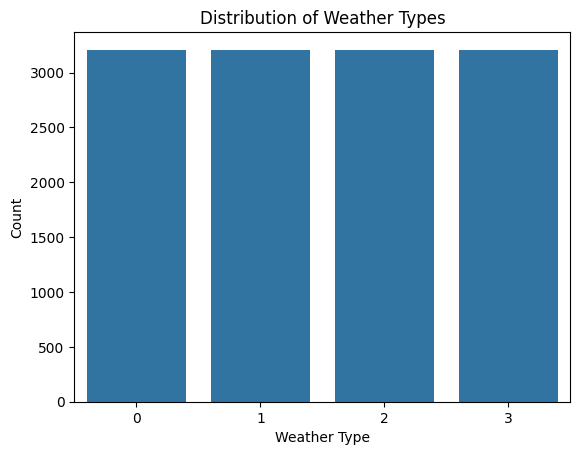

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot target variable distribution
sns.countplot(x='Weather_Type', data=data_processed)
plt.title("Distribution of Weather Types")
plt.xlabel("Weather Type")
plt.ylabel("Count")

# Show the plot
plt.show()


This is a bar chart showing the distribution of weather types in the dataset.

Here's the interpretation:

The x-axis represents the Weather Types (labeled as 0, 1, 2, 3, likely corresponding to Rainy, Cloudy, Sunny, and Snowy).
The y-axis represents the Count of occurrences for each weather type.
All four weather types have approximately equal counts (~3300 each), indicating a balanced dataset for the target variable.
This balanced distribution simplifies the modeling process by reducing the need for resampling techniques to handle imbalanced classes.

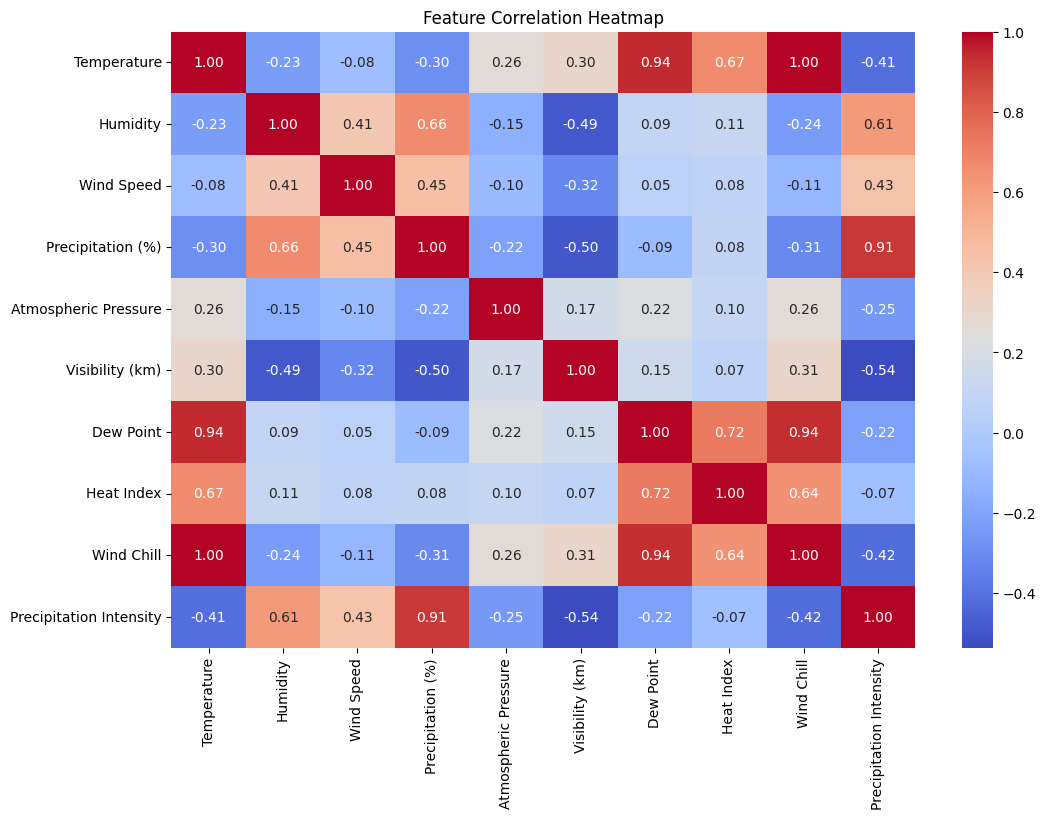

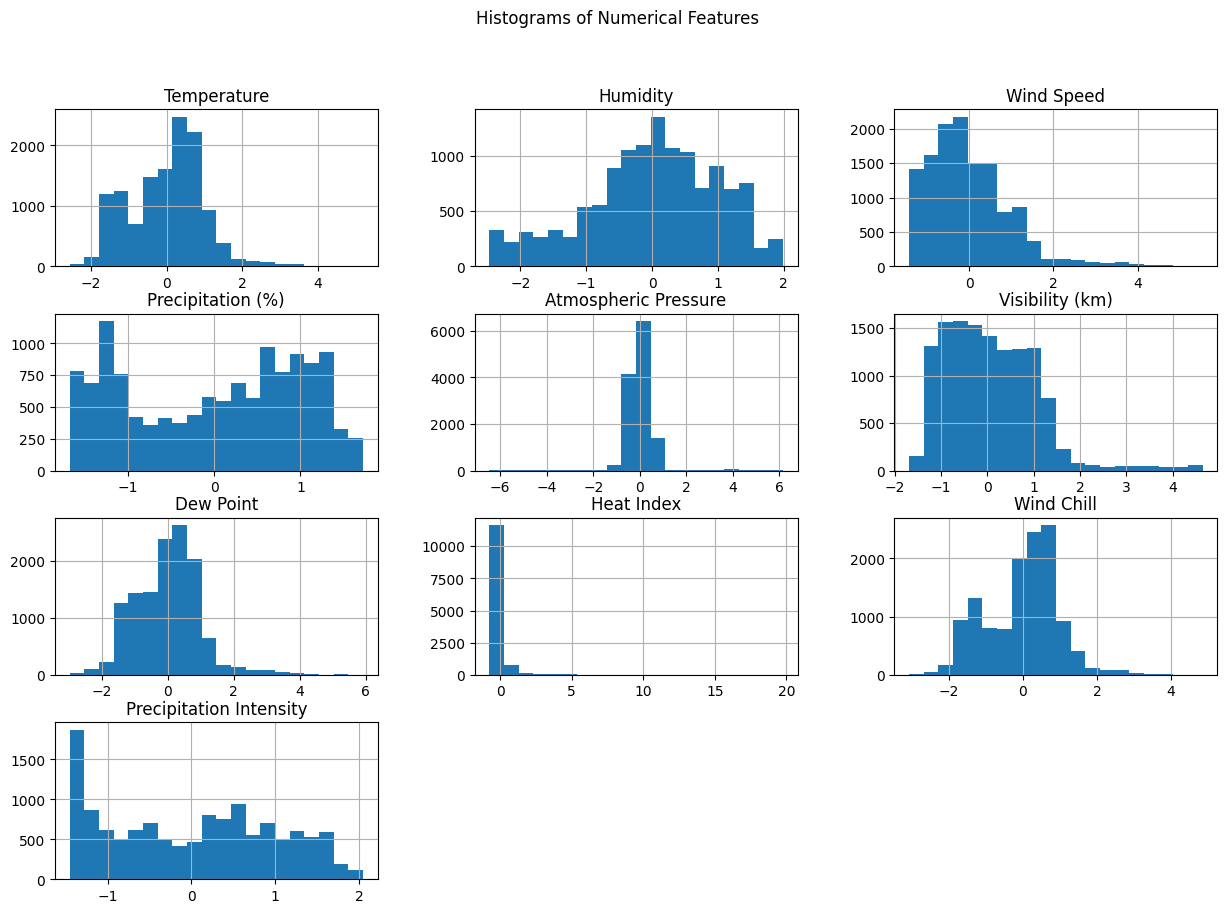

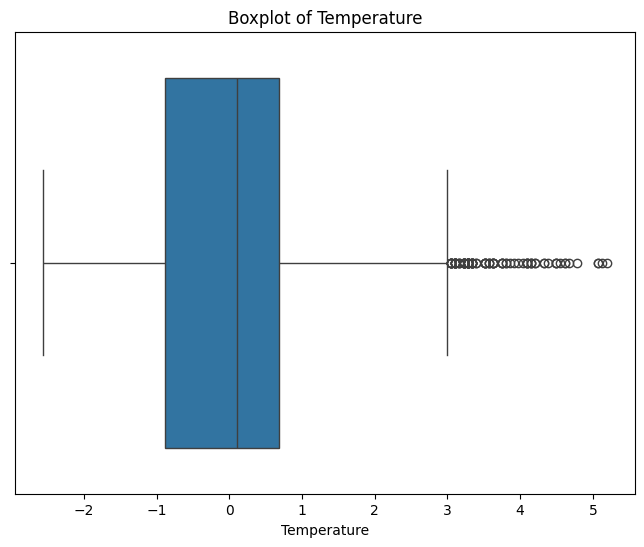

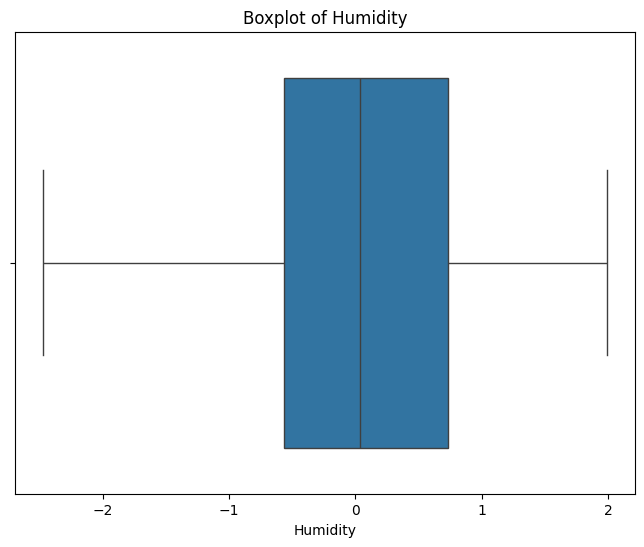

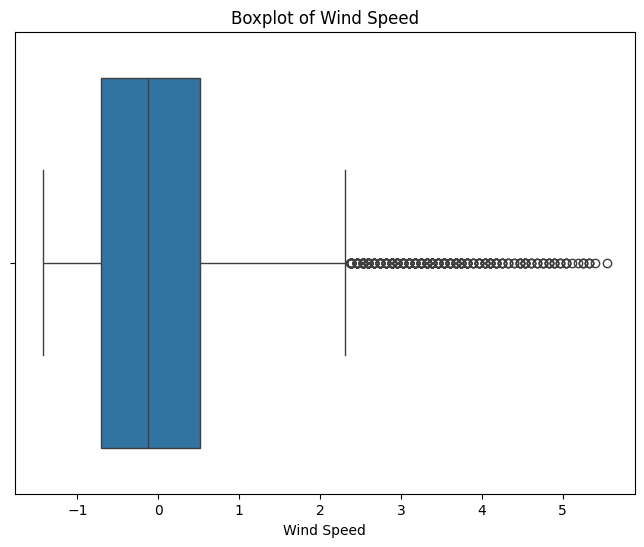

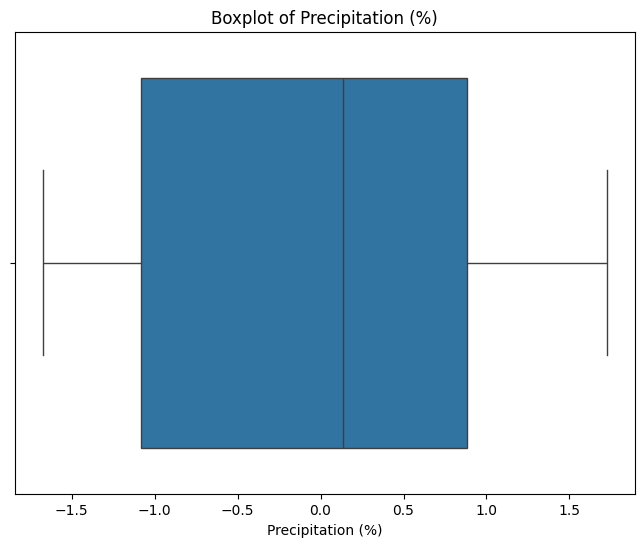

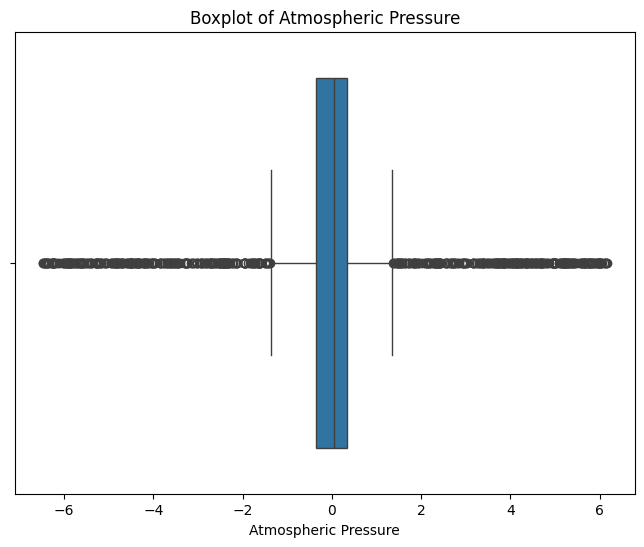

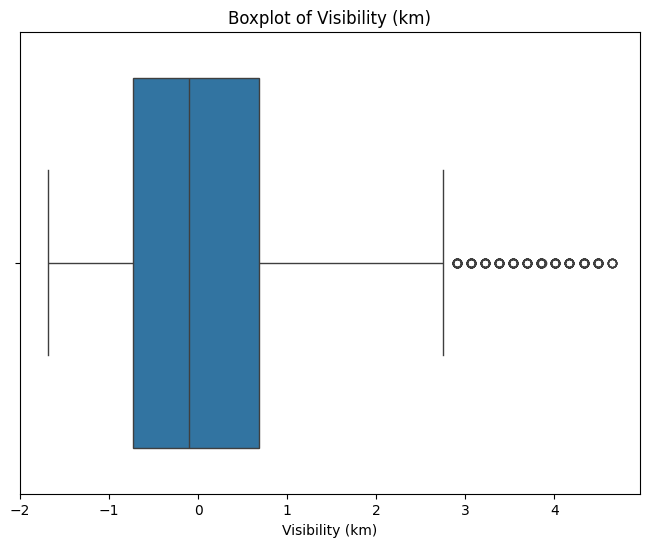

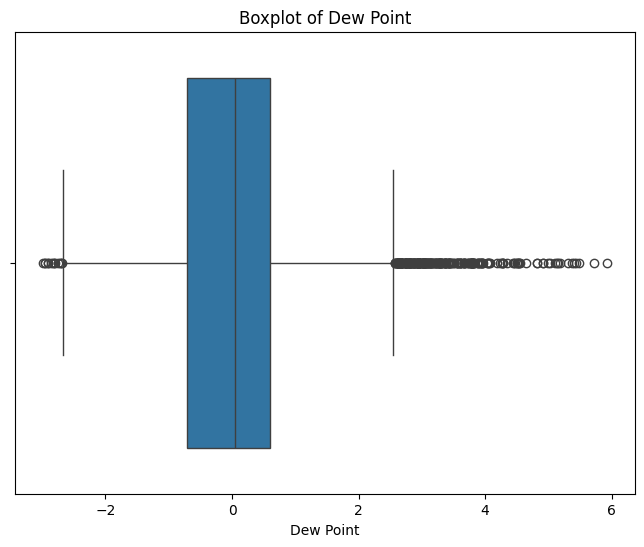

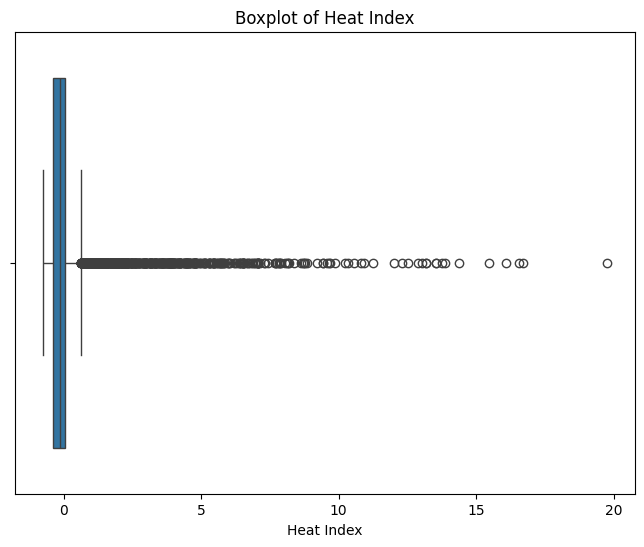

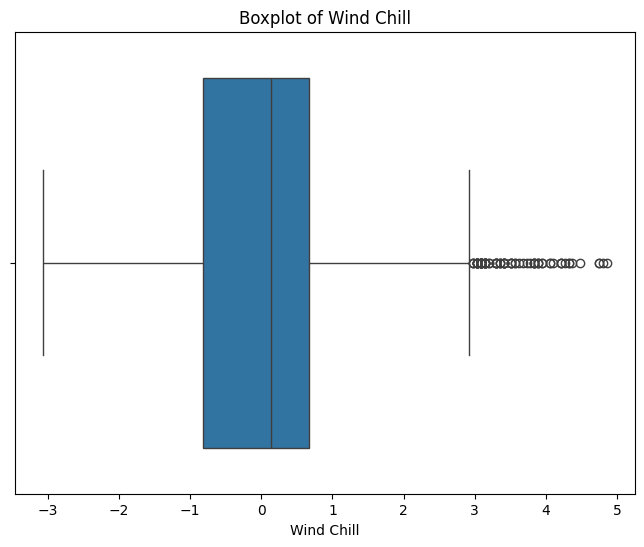

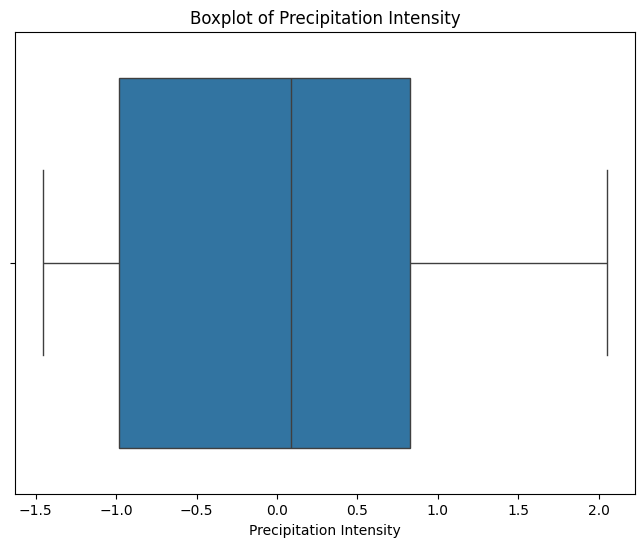

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'Visibility (km)', 'Dew Point',
                     'Heat Index', 'Wind Chill', 'Precipitation Intensity']

# Compute correlations for numerical features
correlation_matrix = data_processed[numerical_columns].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot histograms for numerical features
data_processed[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots for outlier detection
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_processed[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


**Key Observations from the Correlation Heatmap:**

Temperature and Dew Point: Strong positive correlation (0.94), meaning they increase together.

Heat Index and Dew Point: High correlation (0.94), likely indicating a close relationship between perceived heat and humidity.

Humidity and Precipitation (%): Significant positive correlation (0.66), as higher humidity often accompanies precipitation.

Visibility (km) and Precipitation (%): Strong negative correlation (-0.50), as increased precipitation reduces visibility.

Feature Independence:

Features like Wind Speed and Dew Point have weak correlations (close to 0) with most variables, suggesting they may add independent information to the dataset.

Potential Redundancy:

Highly correlated features (e.g., Dew Point, Temperature, Heat Index) could lead to multicollinearity, and one might be dropped or transformed during feature engineering to avoid redundancy.

**Key Observations from the Distribution Tables:**

Temperature:

The distribution appears roughly normal, centered around 0.
There is a slight skew towards higher values (tail extending to the right).

Humidity:

A symmetric distribution centered around 0.
Data spreads across a narrow range, indicating less variability.

Wind Speed:

Positively skewed (right-skewed), with most values clustered around 0 to 1 and a long tail.

Precipitation (%):

Shows a wide spread and possible skewness.
Peaks near the center but with a few extreme values.

Atmospheric Pressure:

Nearly normal distribution centered around 0.
Moderate spread of values.

Visibility (km):

Positively skewed, with most values concentrated near 0 and a long tail on the higher side.

Dew Point:

The distribution is positively skewed, with most values near 0.
Some extreme values are extending to higher ranges.

Heat Index:

Extremely skewed, with a majority of values around 0.
Very few observations beyond 0.

Wind Chill:

Approximately normal with a slight positive skew.

Precipitation Intensity:

Positively skewed with a spike near -1, indicating many low or near-zero values.

**Observations from the boxplots:**From the above boxplots the outliers can still be observed. So that outlier removal and data balancing is repeated again.


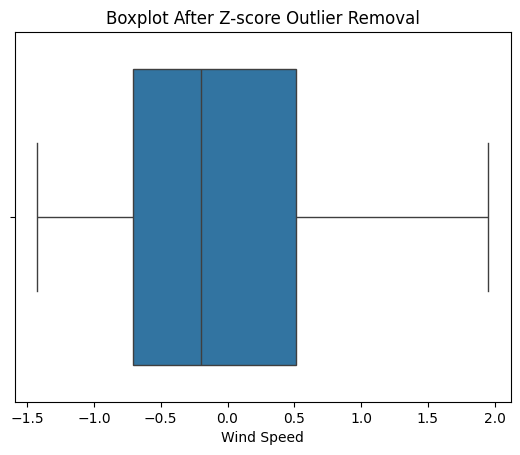

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for the numerical features
z_scores = np.abs(zscore(data_processed[numerical_columns]))

# Apply stricter threshold for removing outliers (e.g., z > 2.5)
data_no_outliers = data_processed[(z_scores < 2).all(axis=1)]

# Check boxplot after removing outliers based on Z-score
sns.boxplot(x=data_no_outliers['Wind Speed'])
plt.title("Boxplot After Z-score Outlier Removal")
plt.show()


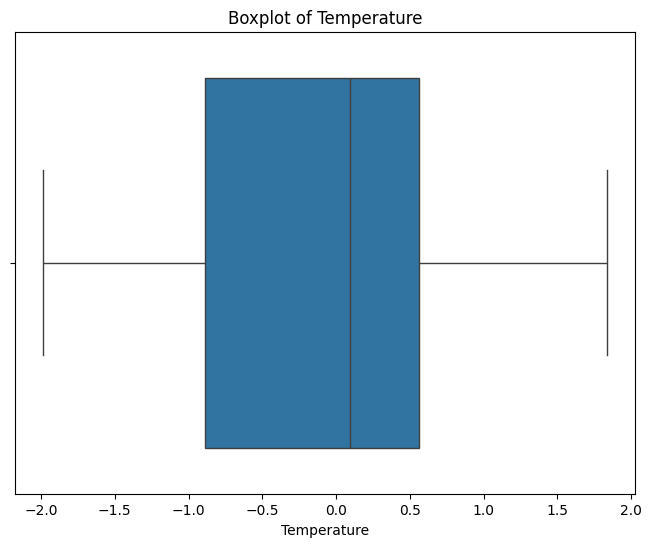

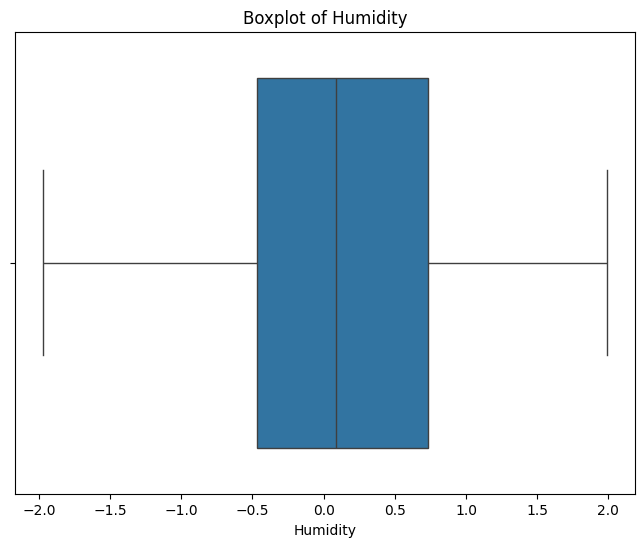

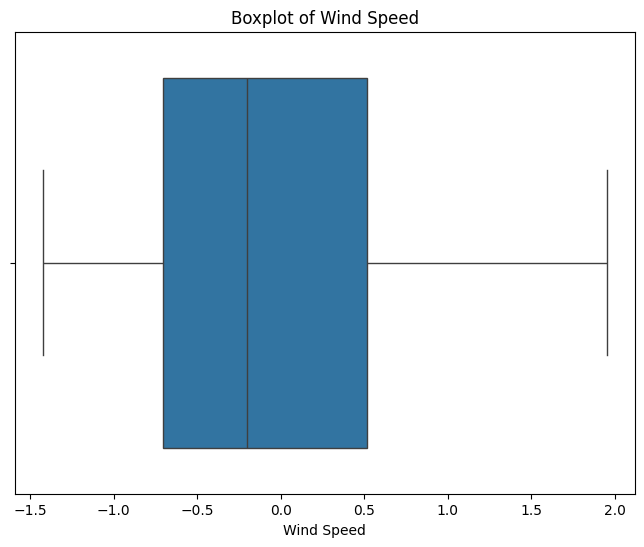

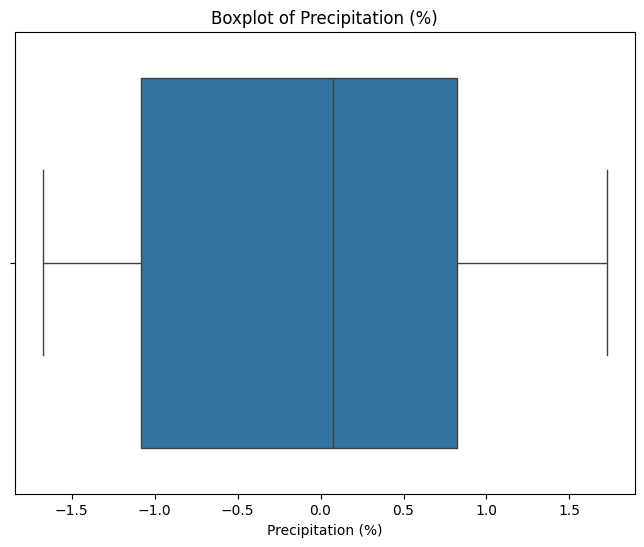

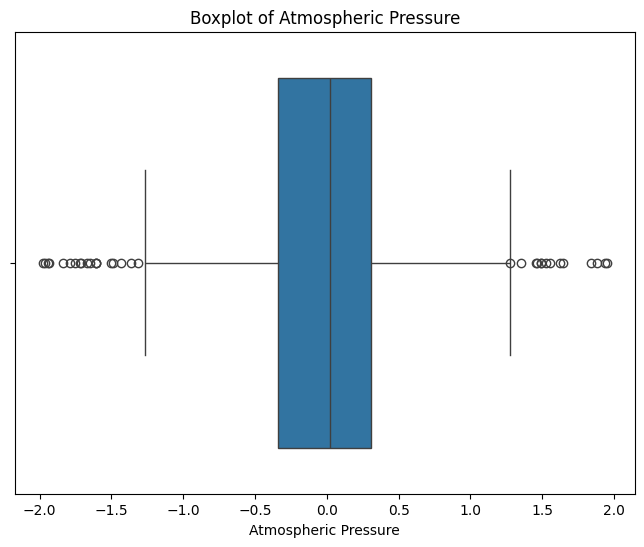

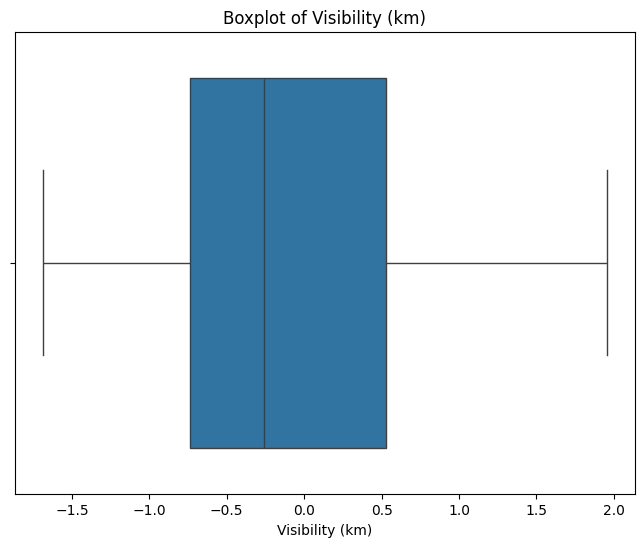

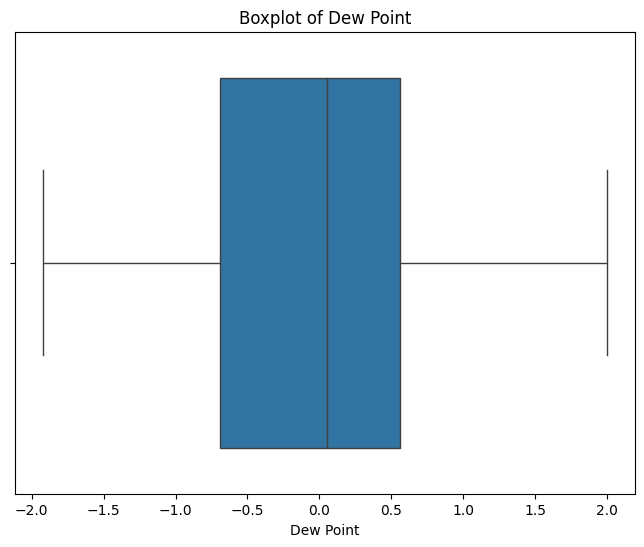

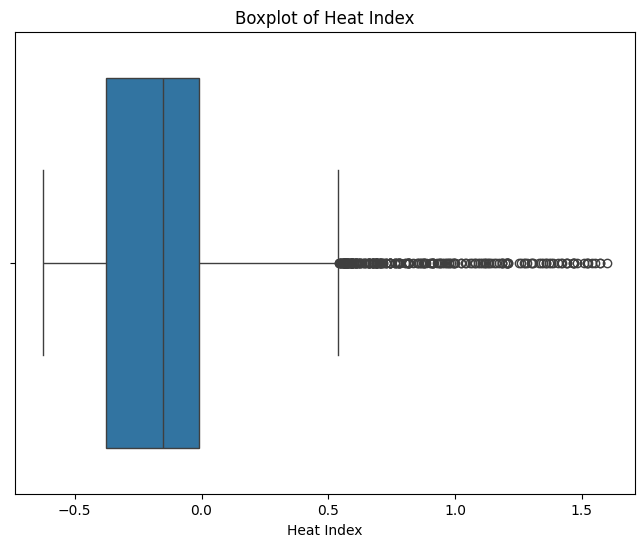

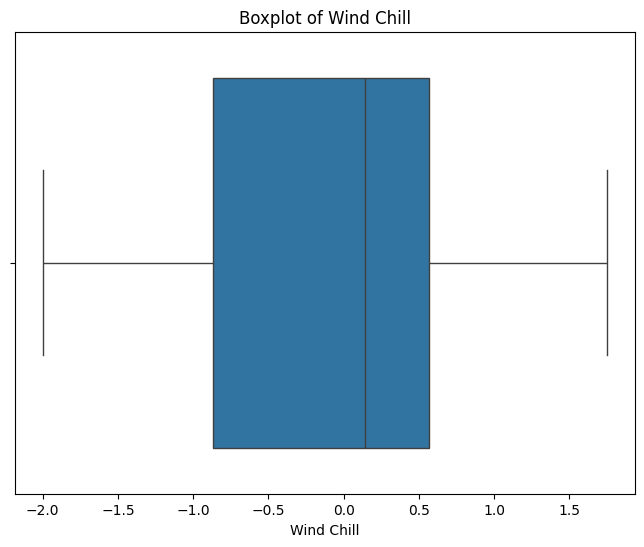

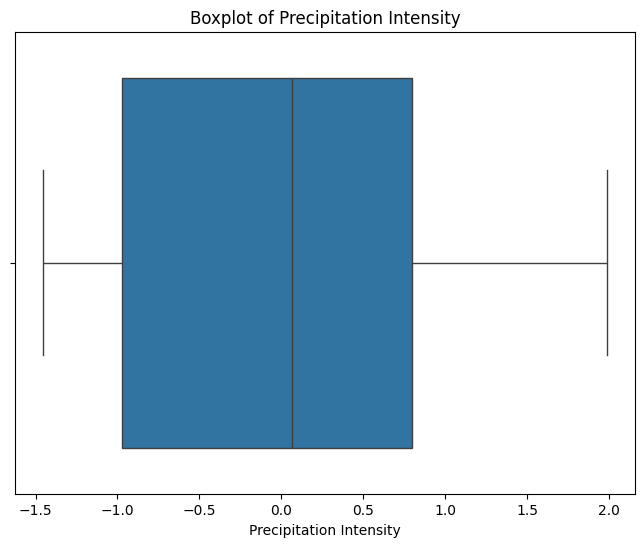

In [ ]:
# Boxplots for outlier detection
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_no_outliers[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

**Key Observation:** After Further adjustments the outliers are removed from the feature variables.

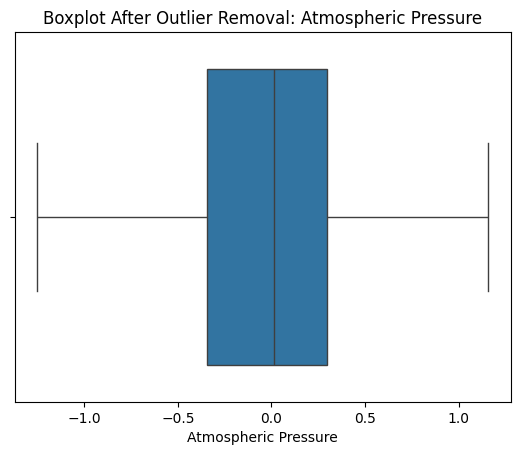

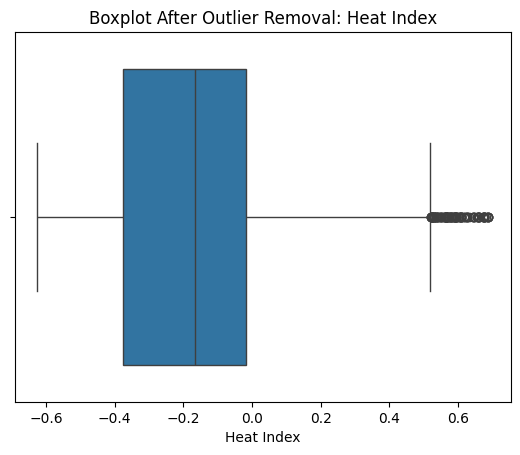


Class Distribution After Balancing:
Weather_Type
1    2806
3    2806
0    2806
2    2806
Name: count, dtype: int64

Data Preview After Outlier Removal and Balancing:
   Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0    -0.307756  0.183887   -0.058573           0.883038              0.152270   
1     0.618223 -0.267153   -0.417747          -1.173641              0.404095   
2     1.081212  0.685042   -1.207929           0.883038              0.644125   
3     0.444602  0.234003    1.018949           0.384450             -0.490044   
4     0.733970 -0.718192   -0.920590          -0.862023              0.127087   

   UV Index  Visibility (km)  Dew Point  Heat Index  Wind Chill  ...  \
0         2        -0.578561  -0.212378   -0.245280   -0.233221  ...   
1         5         0.054590   0.600330    0.012254    0.623512  ...   
2         7        -1.370001   1.348434    0.542298    1.051879  ...   
3         1        -0.895137   0.570998   -0.046256    0.4

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

# Assuming data_processed is your cleaned dataset (after previous steps)

# Define the columns to remove outliers from using Z-score
outlier_columns = ['Atmospheric Pressure', 'Heat Index']

# Define the outlier removal function using Z-score
def remove_outliers_zscore(data_no_outliers, columns, threshold=3):
    # Calculate the Z-scores
    z_scores = np.abs(zscore(data_no_outliers[columns]))

    # Filter out rows where the Z-score is greater than the threshold
    data_no = data_no_outliers[(z_scores < threshold).all(axis=1)]

    return data_no

# Apply Z-score method to remove outliers for 'Atmosphere Pressure' and 'Heat Index'
data_no_ = remove_outliers_zscore(data_no_outliers, outlier_columns, threshold=3)  # You can adjust the threshold if needed

# Check boxplots after removal of outliers
for column in outlier_columns:
    sns.boxplot(x=data_no_[column])
    plt.title(f"Boxplot After Outlier Removal: {column}")
    plt.show()

# Separate features and target after outlier removal
X_no = data_no_.drop(columns=['Weather_Type'])
y_no = data_no_['Weather_Type']

# Apply SMOTE to rebalance the classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_no, y_no)

# Verify class distribution after balancing
print("\nClass Distribution After Balancing:")
print(pd.Series(y_balanced).value_counts())

# Combine features with target into a single DataFrame
data_balanced = pd.DataFrame(X_balanced, columns=X_no.columns)
data_balanced['Weather_Type'] = y_balanced

# Display preview of the balanced dataset
print("\nData Preview After Outlier Removal and Balancing:")
print(data_balanced.head())


<ipython-input-19-334525769392>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Weather_Type'] = data_balanced['Weather_Type']


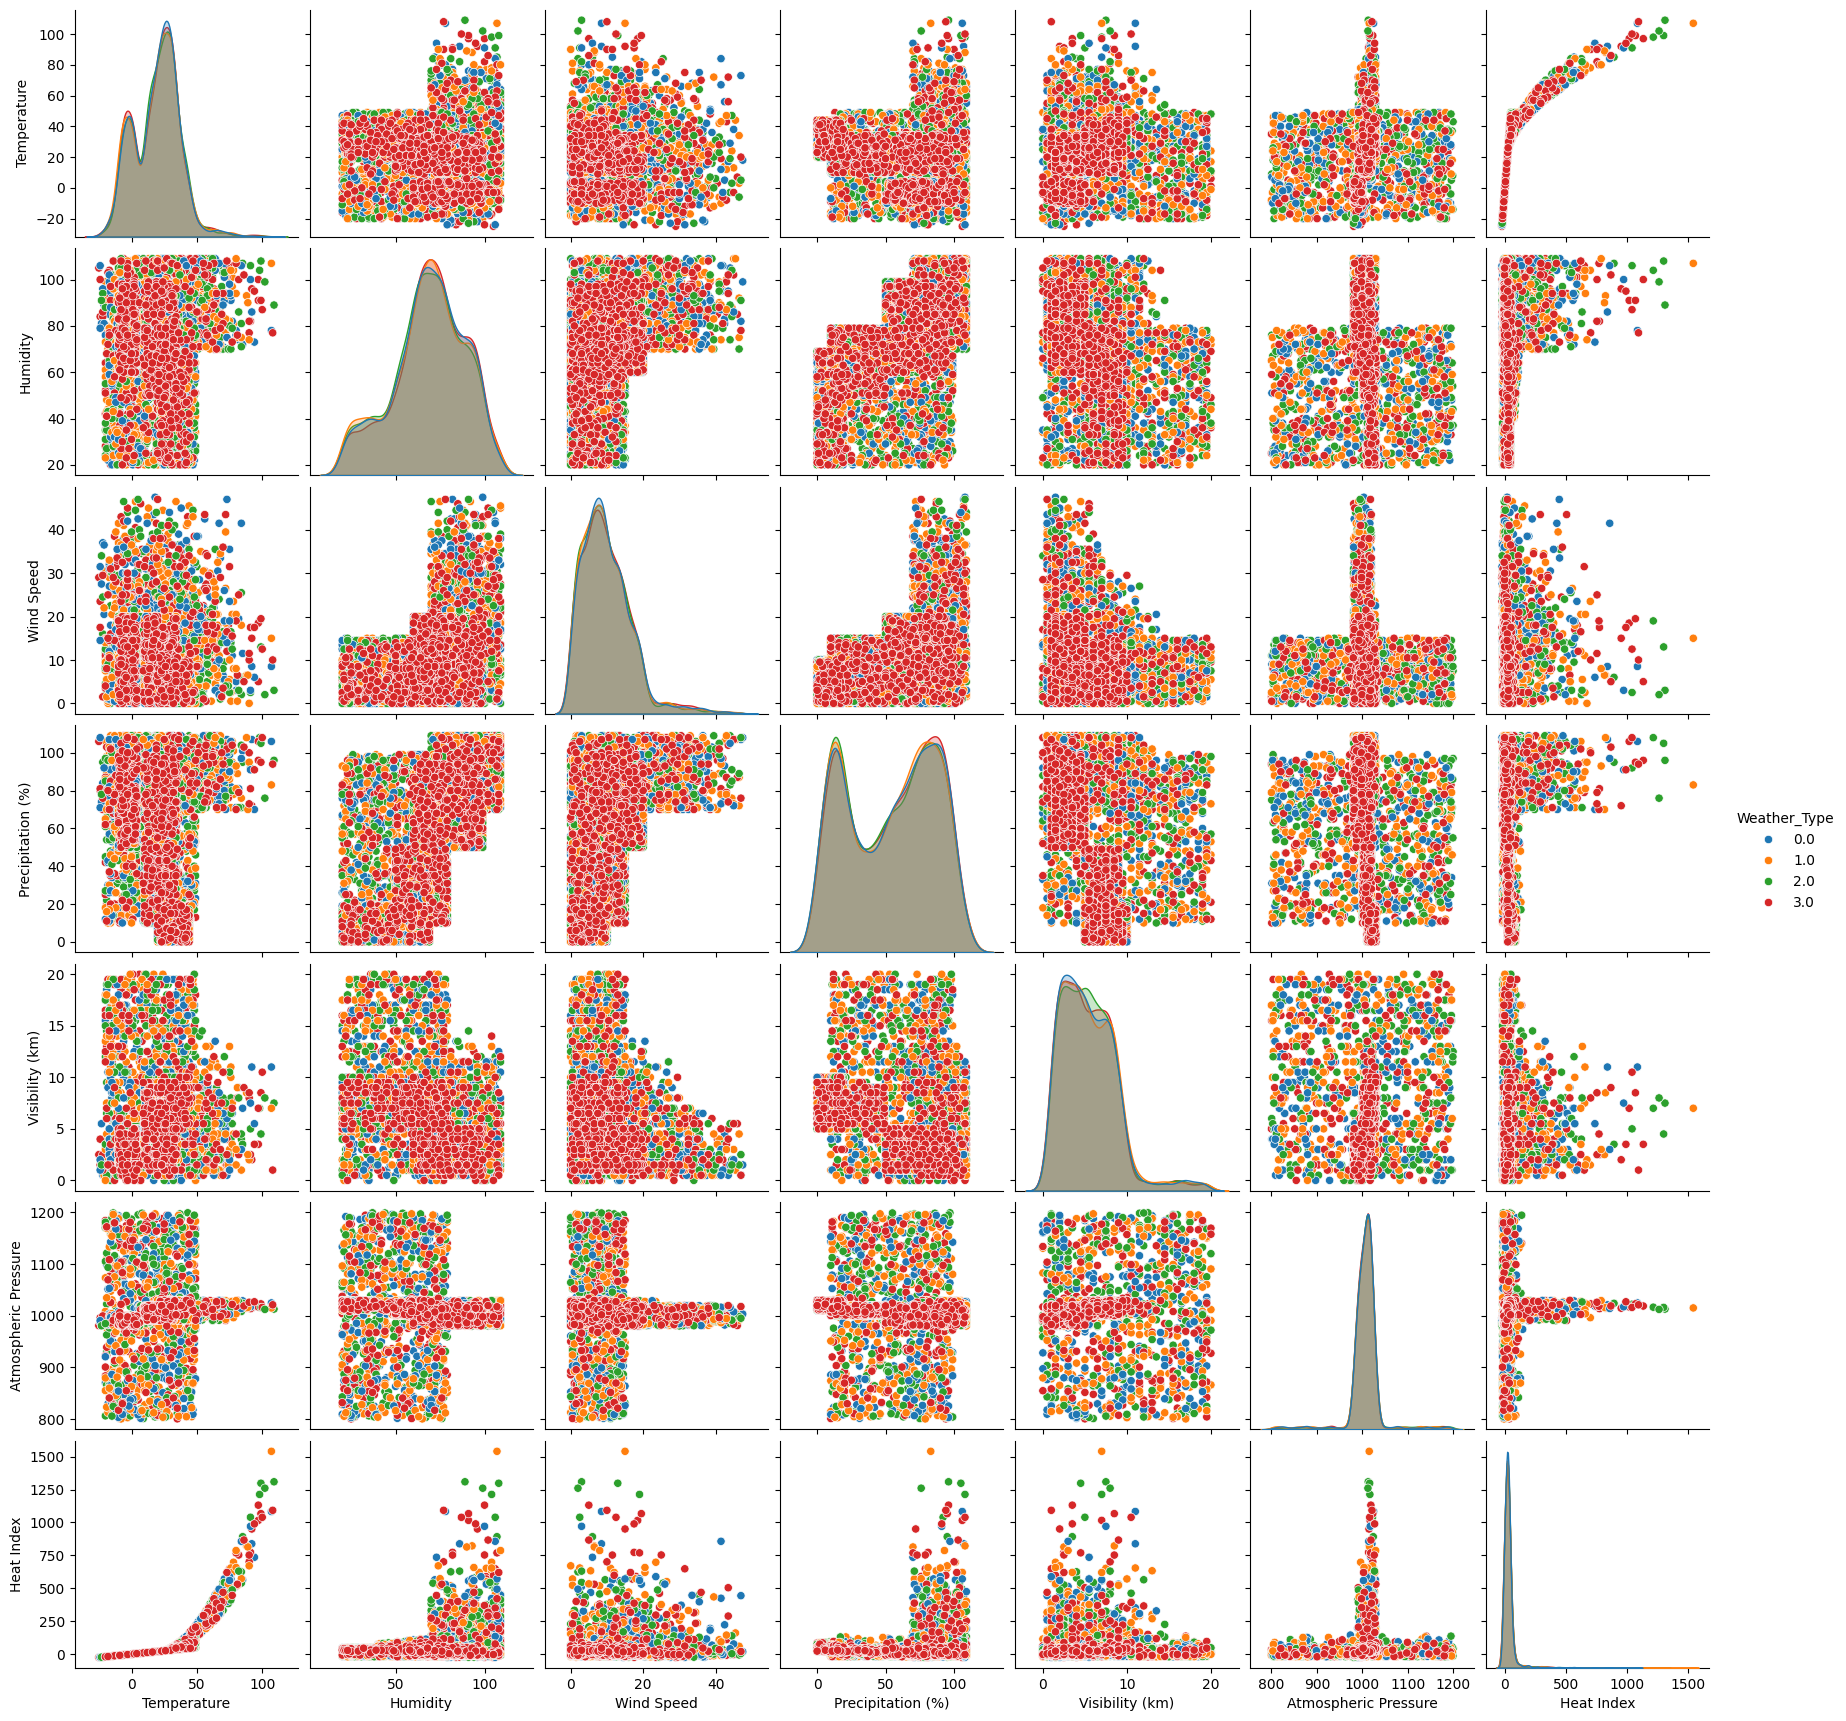

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate pair plot for the dataset
# Select a subset of numerical columns for better visualization if there are many features
subset_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Visibility (km)', "Atmospheric Pressure", 'Heat Index']  # Example columns
subset_data = data[subset_columns]

# Add the target column for color/hue
subset_data['Weather_Type'] = data_balanced['Weather_Type']

# Pair plot
sns.pairplot(subset_data, hue='Weather_Type', diag_kind='kde', palette='tab10')
plt.show()


**Key Observations from the pair Plot:**


*Diagonal Plots (Distributions)*
Each diagonal plot represents the distribution of individual features (e.g., Temperature, Humidity, Wind Speed, Precipitation (%)).

*The key observations:*

Temperature: Bimodal distribution, indicating two distinct clusters of values, potentially corresponding to different weather conditions (e.g., hot vs. cold climates).

Humidity: Peaks near the middle range, suggesting most observations have moderate humidity levels.

Wind Speed: Positively skewed, with most data points concentrated at lower speeds.

Precipitation (%): Bimodal distribution, suggesting two distinct weather conditions: dry and wet.

2. Scatter Plots (Feature Relationships)
The off-diagonal scatter plots illustrate the relationships between pairs of features.


Temperature vs. Humidity:

Negative correlation: Higher temperatures are often associated with lower humidity, and vice versa.
The data is concentrated in distinct clusters, potentially corresponding to different environmental or seasonal conditions.


Temperature vs. Wind Speed:

Slight negative trend: Higher temperatures may correlate with lower wind speeds.
A few extreme wind speed outliers.


Temperature vs. Precipitation (%):

Curved relationship: Higher precipitation levels tend to occur at moderate temperatures rather than extreme ones.


Humidity vs. Precipitation (%):

Strong positive correlation: Higher humidity values are associated with higher precipitation percentages.


Wind Speed vs. Precipitation (%):

No strong trend, but data appears clustered in specific ranges.


3. Color-Coded Categories
The data points are color-coded (red, blue, green, orange), likely indicating groups such as seasons, locations, or weather conditions.

Clusters:
Some clusters appear more densely populated in certain feature ranges, indicating distinct environmental conditions or weather patterns.


*Due to the appearence of multicollinearity between variables. VIF is calculated*

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'data_processed' is your dataset after preprocessing
# We need to handle outliers and missing values first before calculating VIF

# Select numerical columns for VIF calculation (exclude the target variable)
numerical_features = data_balanced.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Weather_Type')  # Exclude the target variable from VIF calculation

# Function to calculate VIF
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

# Add constant to the data for intercept in VIF calculation
X = add_constant(data_balanced[numerical_features])

# Calculate VIF for all features
vif = calculate_vif(X, numerical_features)

# Print initial VIF values
print("Initial VIF values:")
print(vif)


Initial VIF values:
                    feature         VIF
0               Temperature  432.246143
1                  Humidity   24.255344
2                Wind Speed    1.732677
3         Precipitation (%)    9.229598
4      Atmospheric Pressure    2.793392
5                  UV Index    2.559121
6           Visibility (km)    2.373227
7                 Dew Point  205.668740
8                Heat Index    8.275730
9                Wind Chill  222.305090
10  Precipitation Intensity    9.334045


High VIF values can be seen in Temperature, Humidity,Dew Point and Wind Chill. So the variable dew point is removed and calculations are done next.


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'data_processed' is your dataset after preprocessing
# Select numerical columns for VIF calculation (exclude the target variable)
numerical_features = data_balanced.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Weather_Type')  # Exclude the target variable from VIF calculation

# Remove 'Dew Point' feature from the numerical features list
if 'Dew Point' in numerical_features:
    numerical_features.remove('Dew Point')

# Function to calculate VIF
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

# Add constant to the data for intercept in VIF calculation
X = add_constant(data_balanced[numerical_features])

# Calculate VIF for all features after removing 'Dew Point'
vif = calculate_vif(X, numerical_features)

# Print updated VIF values
print("Updated VIF values after removing 'Dew Point':")
print(vif)

Updated VIF values after removing 'Dew Point':
                   feature         VIF
0              Temperature  249.331054
1                 Humidity    2.107411
2               Wind Speed    1.714340
3        Precipitation (%)    9.229137
4     Atmospheric Pressure    2.789717
5                 UV Index    2.527947
6          Visibility (km)    2.372524
7               Heat Index    8.102856
8               Wind Chill  214.725376
9  Precipitation Intensity    9.333936


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'data_processed' is your dataset after preprocessing
# Select numerical columns for VIF calculation (exclude the target variable)
numerical_features = data_balanced.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Weather_Type')  # Exclude the target variable from VIF calculation

# Remove 'Dew Point' and 'Wind Chill' features from the numerical features list
if 'Dew Point' in numerical_features:
    numerical_features.remove('Dew Point')
if 'Wind Chill' in numerical_features:
    numerical_features.remove('Wind Chill')

# Create a new dataset without 'Dew Point' and 'Wind Chill'
data_no_dew_wind_chill = data_balanced.drop(columns=['Dew Point', 'Wind Chill'])

# Function to calculate VIF
def calculate_vif(data, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
    return vif_data

# Add constant to the data for intercept in VIF calculation
X = add_constant(data_no_dew_wind_chill[numerical_features])

# Calculate VIF for the new dataset without 'Dew Point' and 'Wind Chill'
vif = calculate_vif(X, numerical_features)

# Print updated VIF values
print("Updated VIF values after removing 'Dew Point' and 'Wind Chill':")
print(vif)

Updated VIF values after removing 'Dew Point' and 'Wind Chill':
                   feature       VIF
0              Temperature  8.590824
1                 Humidity  2.056859
2               Wind Speed  1.324278
3        Precipitation (%)  9.143036
4     Atmospheric Pressure  2.697611
5                 UV Index  2.334949
6          Visibility (km)  2.371901
7               Heat Index  7.030565
8  Precipitation Intensity  9.332877


**Key Observation:** Removal of the variables Dew Point and Wind Chill has reduced the overall VIF values.

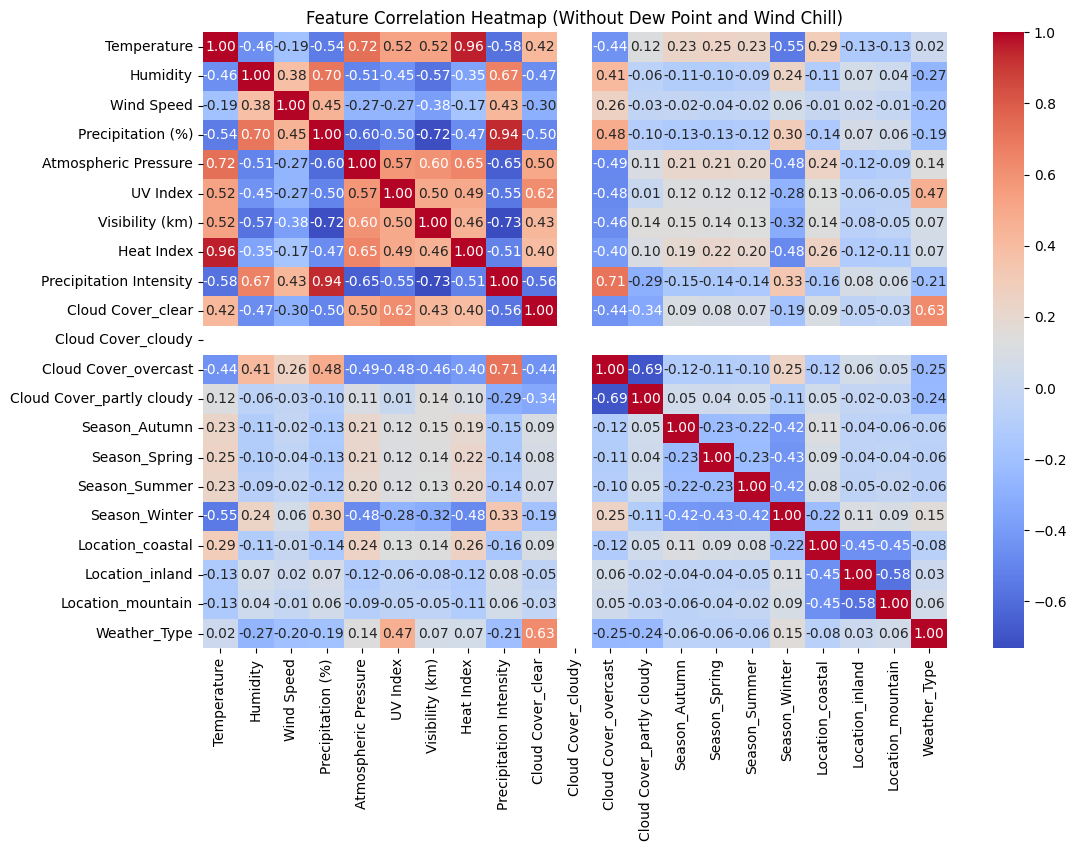

In [ ]:
# Compute correlations for numerical features in the new dataset (without Dew Point and Wind Chill)
correlation_matrix_no_dew_wind_chill = data_no_dew_wind_chill.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_no_dew_wind_chill, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Feature Correlation Heatmap (Without Dew Point and Wind Chill)")
plt.show()



**Special Note:**

The features Wind Chill and Dew Point was removed from the dataset as they have high VIF value and contribute to multicollinearity issue.


**Running Models and Model Evaluation for data_no_dew_wind_chill dataset**

Model Evaluation is done without te feature variables Dew Point and Wind Chill.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
# Get column names
columns = data_no_dew_wind_chill.columns

# Get data types
data_types = data_no_dew_wind_chill.dtypes

# Display column names and data types
print("Column Names:")
print(columns)

print("\nData Types:")
print(data_types)
print(data_no_dew_wind_chill.head())


Column Names:
Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)', 'Heat Index',
       'Precipitation Intensity', 'Cloud Cover_clear', 'Cloud Cover_cloudy',
       'Cloud Cover_overcast', 'Cloud Cover_partly cloudy', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Location_coastal',
       'Location_inland', 'Location_mountain', 'Weather_Type'],
      dtype='object')

Data Types:
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
Precipitation (%)            float64
Atmospheric Pressure         float64
UV Index                       int64
Visibility (km)              float64
Heat Index                   float64
Precipitation Intensity      float64
Cloud Cover_clear               bool
Cloud Cover_cloudy              bool
Cloud Cover_overcast            bool
Cloud Cover_partly cloudy       bool
Season_Autumn                

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Convert the target variable 'Weather_Type' into categorical
data_no_dew_wind_chill['Weather_Type'] = data_no_dew_wind_chill['Weather_Type'].astype('category')

# Separate features and target
X = data_no_dew_wind_chill.drop('Weather_Type', axis=1)  # Features
y = data_no_dew_wind_chill['Weather_Type']              # Target variable (categorical)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes of the datasets for verification
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Verify that the target variable is now categorical
print("\nTarget Variable Data Type:", y.dtypes)
print("\nTarget Variable Categories:", y.cat.categories)



Training Features Shape: (7856, 20)
Testing Features Shape: (3368, 20)
Training Labels Shape: (7856,)
Testing Labels Shape: (3368,)

Target Variable Data Type: category

Target Variable Categories: Index([0, 1, 2, 3], dtype='int64')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN classifier with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training set
knn_model.fit(X_train, y_train)

# Predict the target variable for the test set
knn_preds = knn_model.predict(X_test)

# Evaluate the KNN model
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))  # Accuracy score
print("\nClassification Report:\n", classification_report(y_test, knn_preds))  # Classification report



KNN Accuracy: 0.9631828978622328

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       834
           1       0.95      0.94      0.95       850
           2       0.96      0.99      0.98       834
           3       0.99      0.96      0.97       850

    accuracy                           0.96      3368
   macro avg       0.96      0.96      0.96      3368
weighted avg       0.96      0.96      0.96      3368



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the GBC model on the training set
gbc_model.fit(X_train, y_train)

# Predict the target variable for the test set
gbc_preds = gbc_model.predict(X_test)

# Evaluate the GBC model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gbc_preds))  # Accuracy score
print("\nClassification Report:\n", classification_report(y_test, gbc_preds))  # Classification report


Gradient Boosting Accuracy: 0.9842636579572447

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       834
           1       0.97      0.98      0.98       850
           2       1.00      0.99      1.00       834
           3       0.99      0.99      0.99       850

    accuracy                           0.98      3368
   macro avg       0.98      0.98      0.98      3368
weighted avg       0.98      0.98      0.98      3368



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the Naive Bayes model on the training data
nb_model.fit(X_train, y_train)

# Predict the target variable for the test set
nb_preds = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))  # Overall accuracy
print("\nClassification Report:\n", classification_report(y_test, nb_preds))  # Detailed classification metrics



Naive Bayes Accuracy: 0.9236935866983373

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       834
           1       0.92      0.91      0.92       850
           2       0.94      0.99      0.97       834
           3       1.00      0.85      0.92       850

    accuracy                           0.92      3368
   macro avg       0.93      0.92      0.92      3368
weighted avg       0.93      0.92      0.92      3368



In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model on the training data
lr_model.fit(X_train, y_train)

# Predict the target variable for the test set
lr_preds = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))  # Overall accuracy
print("\nClassification Report:\n", classification_report(y_test, lr_preds))  # Detailed classification metrics



Logistic Regression Accuracy: 0.9703087885985748

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       834
           1       0.96      0.97      0.96       850
           2       0.99      0.99      0.99       834
           3       0.98      0.97      0.98       850

    accuracy                           0.97      3368
   macro avg       0.97      0.97      0.97      3368
weighted avg       0.97      0.97      0.97      3368



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test set
rf_preds = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))  # Overall accuracy
print("\nClassification Report:\n", classification_report(y_test, rf_preds))  # Detailed classification metrics


Random Forest Accuracy: 0.9854513064133017

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       834
           1       0.97      0.98      0.98       850
           2       1.00      0.99      0.99       834
           3       1.00      0.99      0.99       850

    accuracy                           0.99      3368
   macro avg       0.99      0.99      0.99      3368
weighted avg       0.99      0.99      0.99      3368



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable for the test set
dt_preds = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))  # Accuracy of the model
print("\nClassification Report:\n", classification_report(y_test, dt_preds))  # Detailed metrics (precision, recall, F1-score)



Decision Tree Accuracy: 0.9833729216152018

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       834
           1       0.97      0.98      0.98       850
           2       1.00      0.99      0.99       834
           3       0.98      0.99      0.99       850

    accuracy                           0.98      3368
   macro avg       0.98      0.98      0.98      3368
weighted avg       0.98      0.98      0.98      3368



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and fit the SVM model (with a linear kernel as a starting point)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict the target variable for the test set
svm_preds = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))  # Accuracy of the model
print("\nClassification Report:\n", classification_report(y_test, svm_preds))  # Detailed metrics (precision, recall, F1-score)


SVM Accuracy: 0.9747624703087886

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       834
           1       0.96      0.98      0.97       850
           2       1.00      0.99      1.00       834
           3       0.98      0.97      0.98       850

    accuracy                           0.97      3368
   macro avg       0.97      0.97      0.97      3368
weighted avg       0.97      0.97      0.97      3368



<ipython-input-59-1eb0a562e0c1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), width=0.5, palette='viridis')  # Adjust width here


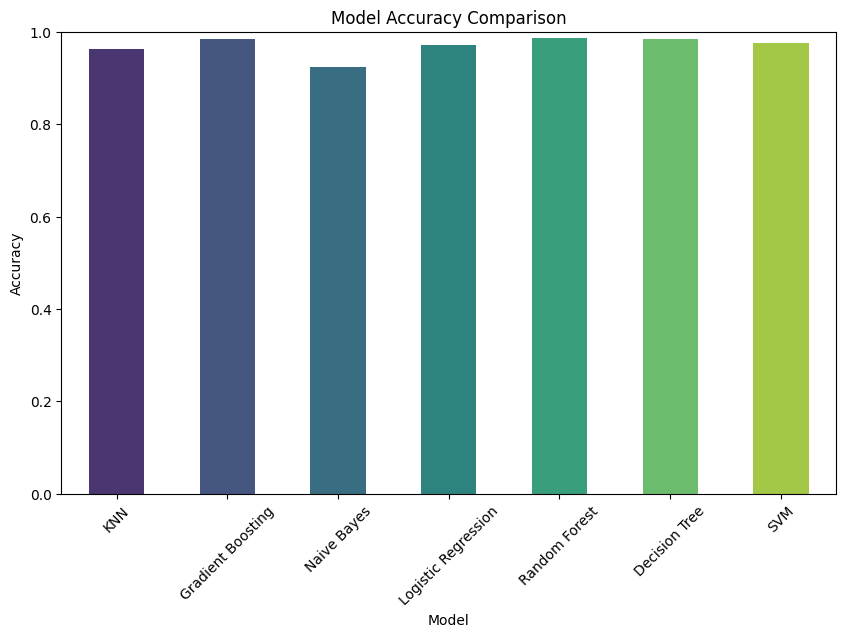

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy scores as values
model_results = {
    'KNN': 0.9631828978622328,
    'Gradient Boosting': 0.9842636579572447,
    'Naive Bayes': 0.9236935866983373,
    'Logistic Regression':0.9703087885985748,
    'Random Forest': 0.9854513064133017,
    'Decision Tree': 0.9833729216152018,
    'SVM': 0.9747624703087886
}

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), width=0.5, palette='viridis')  # Adjust width here
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy percentage

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


**Running Models and Model Evaluation for data_balanced dataset**

Model Evaluation is done with all the feature variables.

In [ ]:
# Get column names
columns = data_balanced.columns

# Get data types
data_types = data_balanced.dtypes

# Display column names and data types
print("Column Names:")
print(columns)

print("\nData Types:")
print(data_types)
print(data_balanced.head())

Column Names:
Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)', 'Dew Point',
       'Heat Index', 'Wind Chill', 'Precipitation Intensity',
       'Cloud Cover_clear', 'Cloud Cover_cloudy', 'Cloud Cover_overcast',
       'Cloud Cover_partly cloudy', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Location_coastal', 'Location_inland',
       'Location_mountain', 'Weather_Type'],
      dtype='object')

Data Types:
Temperature                  float64
Humidity                     float64
Wind Speed                   float64
Precipitation (%)            float64
Atmospheric Pressure         float64
UV Index                       int64
Visibility (km)              float64
Dew Point                    float64
Heat Index                   float64
Wind Chill                   float64
Precipitation Intensity      float64
Cloud Cover_clear               bool
Cloud Cover_cloudy              

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Convert the target variable 'Weather_Type' into categorical
data_balanced['Weather_Type'] = data_balanced['Weather_Type'].astype('category')

# Separate features and target
X = data_balanced.drop('Weather_Type', axis=1)  # Features
y = data_balanced['Weather_Type']              # Target variable (categorical)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes of the datasets for verification
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Verify that the target variable is now categorical
print("\nTarget Variable Data Type:", y.dtypes)
print("\nTarget Variable Categories:", y.cat.categories)

Training Features Shape: (7856, 22)
Testing Features Shape: (3368, 22)
Training Labels Shape: (7856,)
Testing Labels Shape: (3368,)

Target Variable Data Type: category

Target Variable Categories: Index([0, 1, 2, 3], dtype='int64')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN classifier with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training set
knn_model.fit(X_train, y_train)

# Predict the target variable for the test set
knn_preds = knn_model.predict(X_test)

# Evaluate the KNN model
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))  # Accuracy score
print("\nClassification Report:\n", classification_report(y_test, knn_preds))  # Classification report

KNN Accuracy: 0.9682304038004751

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       834
           1       0.95      0.96      0.96       850
           2       0.98      0.99      0.99       834
           3       0.98      0.97      0.97       850

    accuracy                           0.97      3368
   macro avg       0.97      0.97      0.97      3368
weighted avg       0.97      0.97      0.97      3368



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the GBC model on the training set
gbc_model.fit(X_train, y_train)

# Predict the target variable for the test set
gbc_preds = gbc_model.predict(X_test)

# Evaluate the GBC model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gbc_preds))  # Accuracy score
print("\nClassification Report:\n", classification_report(y_test, gbc_preds))  # Classification report


Gradient Boosting Accuracy: 0.9833729216152018

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       834
           1       0.97      0.99      0.98       850
           2       1.00      0.99      0.99       834
           3       0.99      0.99      0.99       850

    accuracy                           0.98      3368
   macro avg       0.98      0.98      0.98      3368
weighted avg       0.98      0.98      0.98      3368



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the Naive Bayes model on the training data
nb_model.fit(X_train, y_train)

# Predict the target variable for the test set
nb_preds = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_preds))  # Overall accuracy
print("\nClassification Report:\n", classification_report(y_test, nb_preds))  # Detailed classification metrics


Naive Bayes Accuracy: 0.9376484560570071

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       834
           1       0.93      0.95      0.94       850
           2       0.98      0.99      0.99       834
           3       1.00      0.87      0.93       850

    accuracy                           0.94      3368
   macro avg       0.94      0.94      0.94      3368
weighted avg       0.94      0.94      0.94      3368



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model on the training data
lr_model.fit(X_train, y_train)

# Predict the target variable for the test set
lr_preds = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))  # Overall accuracy
print("\nClassification Report:\n", classification_report(y_test, lr_preds))  # Detailed classification metrics


Logistic Regression Accuracy: 0.9714964370546318

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       834
           1       0.96      0.97      0.96       850
           2       0.99      0.99      0.99       834
           3       0.98      0.97      0.98       850

    accuracy                           0.97      3368
   macro avg       0.97      0.97      0.97      3368
weighted avg       0.97      0.97      0.97      3368



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable for the test set
rf_preds = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))  # Overall accuracy
print("\nClassification Report:\n", classification_report(y_test, rf_preds))  # Detailed classification metrics


Random Forest Accuracy: 0.9848574821852731

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       834
           1       0.97      0.98      0.98       850
           2       1.00      0.99      0.99       834
           3       1.00      0.99      0.99       850

    accuracy                           0.98      3368
   macro avg       0.98      0.98      0.98      3368
weighted avg       0.98      0.98      0.98      3368



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable for the test set
dt_preds = dt_model.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))  # Accuracy of the model
print("\nClassification Report:\n", classification_report(y_test, dt_preds))  # Detailed metrics (precision, recall, F1-score)


Decision Tree Accuracy: 0.9830760095011877

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       834
           1       0.97      0.98      0.98       850
           2       1.00      0.99      0.99       834
           3       0.98      0.99      0.99       850

    accuracy                           0.98      3368
   macro avg       0.98      0.98      0.98      3368
weighted avg       0.98      0.98      0.98      3368



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and fit the SVM model (with a linear kernel as a starting point)
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict the target variable for the test set
svm_preds = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))  # Accuracy of the model
print("\nClassification Report:\n", classification_report(y_test, svm_preds))  # Detailed metrics (precision, recall, F1-score)


SVM Accuracy: 0.9756532066508313

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       834
           1       0.96      0.98      0.97       850
           2       1.00      0.99      1.00       834
           3       0.98      0.97      0.98       850

    accuracy                           0.98      3368
   macro avg       0.98      0.98      0.98      3368
weighted avg       0.98      0.98      0.98      3368



<ipython-input-69-062ba7e8f086>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), width=0.5, palette='viridis')  # Adjust width here


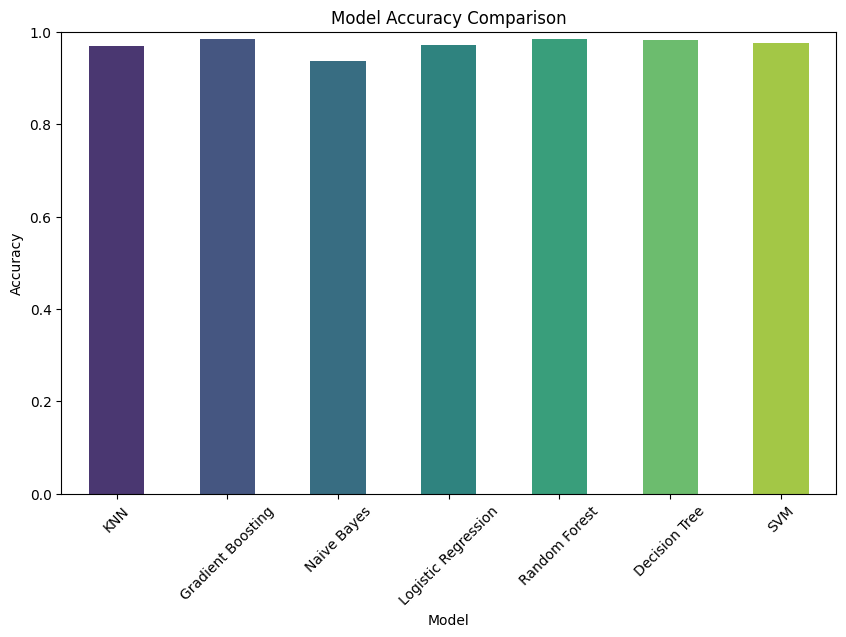

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy scores as values
model_results = {
    'KNN': 0.9682304038004751,
    'Gradient Boosting': 0.9833729216152018,
    'Naive Bayes': 0.9376484560570071,
    'Logistic Regression':0.9714964370546318,
    'Random Forest': 0.9848574821852731,
    'Decision Tree': 0.9830760095011877,
    'SVM': 0.9756532066508313
}

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), width=0.5, palette='viridis')  # Adjust width here
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy percentage

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


**Conclusion:**

Based on the evaluation of several models on two different datasets—one containing all feature variables and the other excluding the Wind Chill and Dew Point variables—it was observed that the removal of these features did not significantly impact the model accuracy. Therefore, for the subsequent stages of the analysis, the dataset with these two variables excluded was selected.

This decision was primarily driven by the need to address multicollinearity. Multicollinearity occurs when two or more features in the dataset are highly correlated, which can cause instability in the model and make it difficult to interpret the effect of individual features. By removing Wind Chill and Dew Point, we reduced multicollinearity, simplifying the model and improving its interpretability without sacrificing performance. This approach helps to ensure that the model provides more reliable and stable predictions moving forward.

# **4.Model Training and Evaluation**

The dataframe without the variables Dew Point and Wind Chill is selected.

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='linear', C=1.0, random_state=42, probability=True)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Check if the model supports predict_proba
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1] if model.classes_.size == 2 else model.predict_proba(X_test)
        try:
            auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        except ValueError:
            auc = 'Not applicable'
    else:
        y_pred_proba = None
        auc = 'Not applicable'

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Adjusting for multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')  # Adjusting for multi-class classification
    f1 = f1_score(y_test, y_pred, average='weighted')  # Adjusting for multi-class classification

    # Print results
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"AUC-ROC: {auc}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

Logistic Regression Performance:
Accuracy: 0.905
Precision: 0.906
Recall: 0.905
F1-Score: 0.905
AUC-ROC: 0.9723194763936059
Confusion Matrix:
[[586  48  15  13]
 [ 39 577  40   6]
 [ 16   2 608  10]
 [ 35  11   9 552]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       662
           1       0.90      0.87      0.89       662
           2       0.90      0.96      0.93       636
           3       0.95      0.91      0.93       607

    accuracy                           0.90      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.90      0.90      2567



KNN Performance:
Accuracy: 0.918
Precision: 0.919
Recall: 0.918
F1-Score: 0.918
AUC-ROC: 0.9779688262921656
Confusion Matrix:
[[599  40   9  14]
 [ 35 590  30   7]
 [ 21   4 607   4]
 [ 27  13   6 561]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       662
           1       0.91      0.8

In [8]:
# Evaluate overfitting by comparing training and test accuracy
for model_name, model in models.items():
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"\n{model_name} - Test Accuracy: {test_accuracy:.3f}, Training Accuracy: {train_accuracy:.3f}")


Logistic Regression - Test Accuracy: 0.905, Training Accuracy: 0.893

KNN - Test Accuracy: 0.918, Training Accuracy: 0.930

Naive Bayes - Test Accuracy: 0.818, Training Accuracy: 0.813

Gradient Boosting - Test Accuracy: 0.944, Training Accuracy: 0.963

Random Forest - Test Accuracy: 0.950, Training Accuracy: 1.000

Decision Tree - Test Accuracy: 0.945, Training Accuracy: 1.000

SVM - Test Accuracy: 0.922, Training Accuracy: 0.909


**Conclusion:**  

The results of the machine learning models show varying levels of performance across training and test datasets. **Logistic Regression** performs reasonably well, with training and test accuracies of 0.893 and 0.905, respectively, indicating that it generalizes well with minimal overfitting. **K-Nearest Neighbors (KNN)**achieves high performance, with training and test accuracies of 0.930 and 0.918, respectively, and the small gap between them suggests strong generalization. **Naive Bayes** has lower accuracy compared to other models, with training and test accuracies of 0.813 and 0.818, respectively, indicating that it underperforms but still generalizes adequately. **Gradient Boosting** is highly effective, achieving 0.963 training accuracy and 0.944 test accuracy, with only a small drop between them, suggesting minimal overfitting and strong model performance. **Random Forest** achieves perfect training accuracy (1.000) and a high test accuracy of 0.950, but the large gap indicates potential overfitting, though it still generalizes well to unseen data. **Decision Tree** also shows perfect training accuracy (1.000) and a test accuracy of 0.945, suggesting overfitting, but it still performs well on the test set. Support Vector Machine (SVM) provides solid performance with training and test accuracies of 0.909 and 0.922, respectively, with a small gap that suggests good generalization. In summary, **Gradient Boosting, Random Forest, and Decision Tree** are the top performers, although Random Forest and Decision Tree models may overfit. Logistic Regression and KNN offer reliable and balanced results, while Naive Bayes underperforms relative to the others. To improve, focusing on reducing overfitting in the Random Forest and Decision Tree models could enhance generalization further.








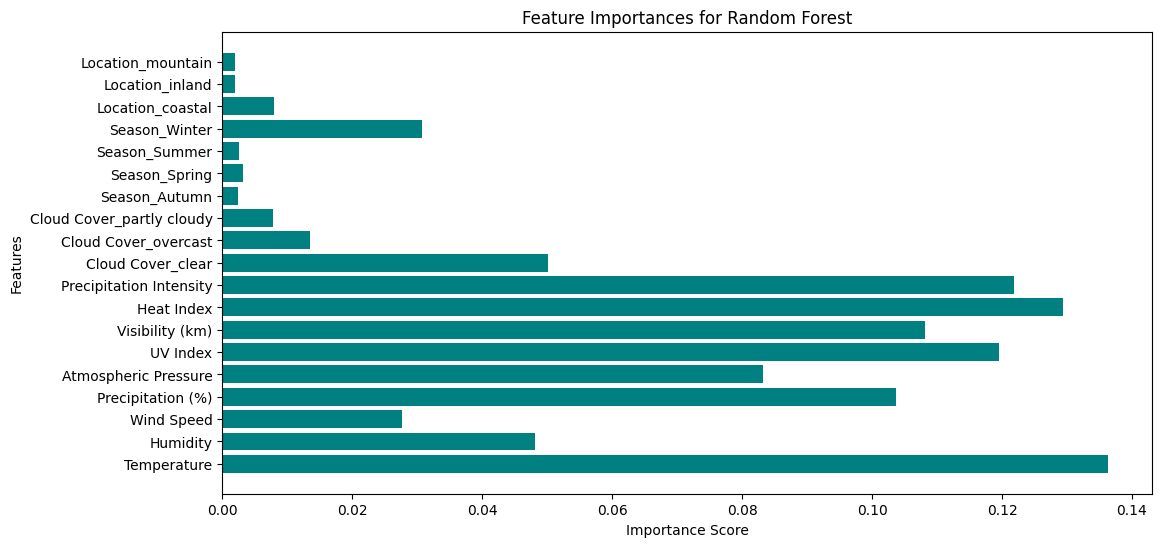

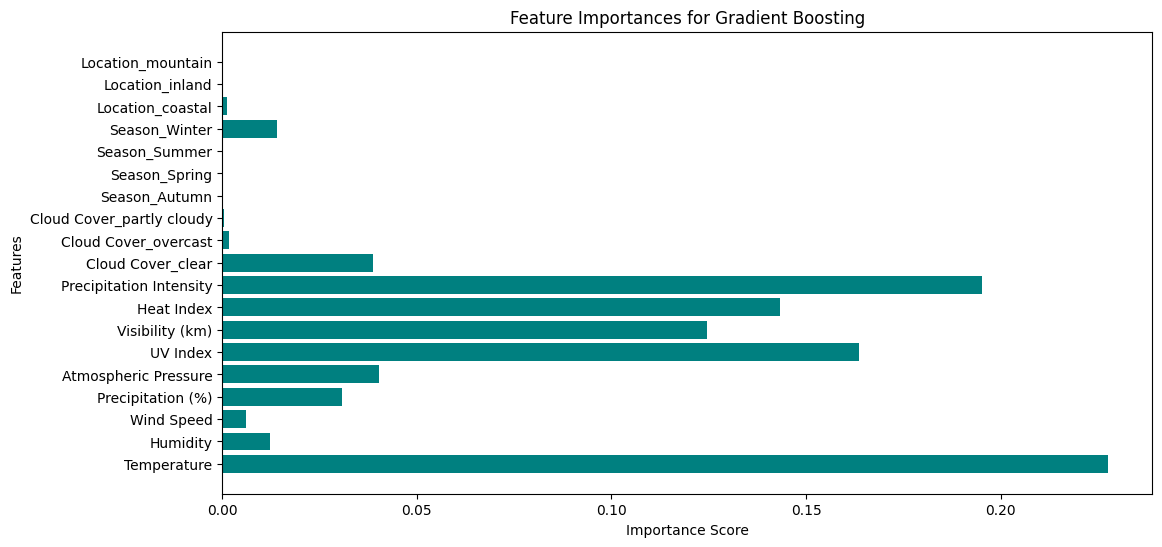

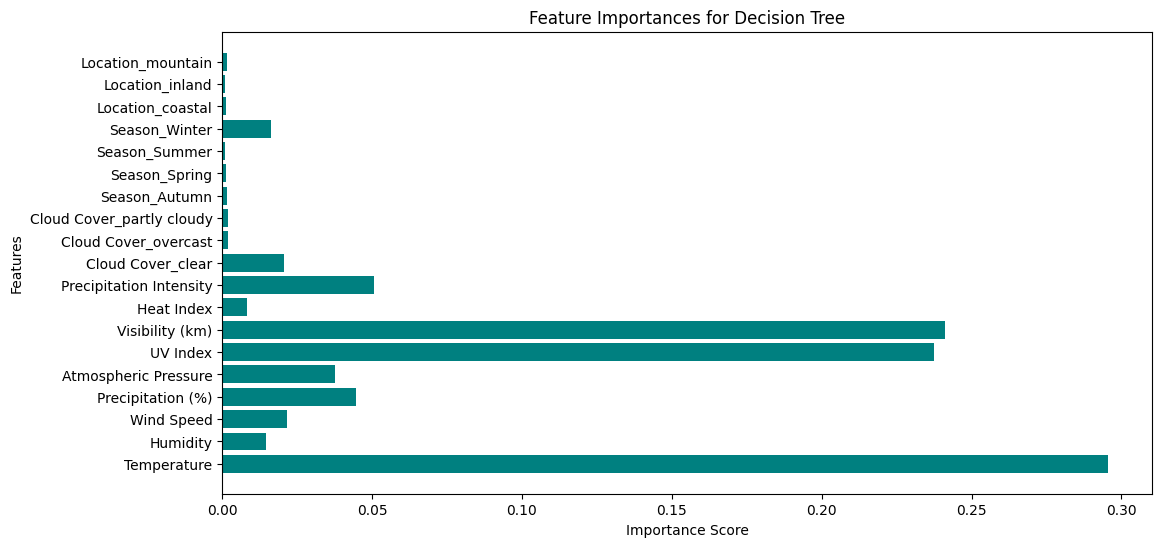

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure all models are trained before plotting feature importances
tree_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']

for model_name in tree_models:
    # Fetch the model
    model = models[model_name]

    # Check if the model has 'feature_importances_' attribute
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_

        # Plot feature importances
        plt.figure(figsize=(12, 6))
        plt.barh(X.columns, feature_importances, color='teal')
        plt.title(f"Feature Importances for {model_name}")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.show()
    else:
        print(f"{model_name} does not have 'feature_importances_' attribute.")

**Feature Importance:**

Precipitation Intensity, Temperature and Visibility features play an important role. Among them Temperature ranks high.


# **5. Hyperparameter Tuning**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np

# Load dataset
five = pd.read_csv('Weather.csv')

# Remove 'Dew Point' and 'Wind Chill' variables
five = five.drop(columns=['Dew Point', 'Wind Chill'])

# Remove missing values
five = five.dropna()

from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
five['Weather Type'] = label_encoder.fit_transform(five['Weather Type'])

print("\nEncoded Target Variable Classes:")
print(label_encoder.classes_)

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the UV Index variable
five['UV Index'] = le.fit_transform(five['UV Index'])

# One-hot encoding for the cloud cover variable
five = pd.get_dummies(five, columns=['Cloud Cover'])


# One-hot encoding for the season variable
five = pd.get_dummies(five, columns=['Season'])

five = pd.get_dummies(five, columns=['Location'])




# List of numerical columns
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'Visibility (km)',
                     'Heat Index', 'Precipitation Intensity']

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(five, columns):
    for col in columns:
        Q1 = five[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = five[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the data within the bounds
        new_five = five[(five[col] >= lower_bound) & (five[col] <= upper_bound)]
    return new_five

# Apply the IQR method to remove outliers from numerical columns
w_data = remove_outliers_iqr(five, numerical_columns)

# Display the shape of the dataset after outlier removal
print(f"Data shape after outlier removal using IQR: {w_data.shape}")







Encoded Target Variable Classes:
['Cloudy' 'Rainy' 'Snowy' 'Sunny']
Data shape after outlier removal using IQR: (12789, 20)


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# List of numerical columns to scale
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'Visibility (km)',
                     'Heat Index',  'Precipitation Intensity']
# Identify numerical columns
numerical_columns = w_data.select_dtypes(include=['float64', 'int64']).columns.drop('Weather Type')

# Initialize scalers
scaler = MinMaxScaler()  # Use StandardScaler() for standardization

# Apply scaling to numerical columns
w_data[numerical_columns] = scaler.fit_transform(w_data[numerical_columns])

In [3]:

# Define features and target variable
X = w_data.drop(columns=['Weather Type'])
y = w_data['Weather Type']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
# Hyperparameter grids for each model
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_nb = {}  # Naive Bayes has no hyperparameters for grid search

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize models and hyperparameter grids
models_params = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), param_grid_lr),
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), param_grid_gb),
    'Naive Bayes': (GaussianNB(), param_grid_nb),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), param_grid_dt),
    'SVM': (SVC(probability=True, random_state=42), param_grid_svm)
}


In [ ]:
# Perform Grid Search for each model
best_models = {}
for model_name, (model, param_grid) in models_params.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store best model and best score
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} - Best Params: {grid_search.best_params_}")
    print(f"{model_name} - Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Evaluate the tuned models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') if hasattr(model, 'predict_proba') else 'N/A'

    print(f"\n{model_name} Performance After Tuning:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"AUC-ROC: {auc if auc != 'N/A' else 'Not applicable'}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Training Logistic Regression...
Logistic Regression - Best Params: {'C': 10, 'solver': 'saga'}
Logistic Regression - Best Cross-Validation Score: 0.8993
Training KNN...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


KNN - Best Params: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
KNN - Best Cross-Validation Score: 0.9104
Training Random Forest...
Random Forest - Best Params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Best Cross-Validation Score: 0.9363
Training Gradient Boosting...
Gradient Boosting - Best Params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Gradient Boosting - Best Cross-Validation Score: 0.9356
Training Naive Bayes...
Naive Bayes - Best Params: {}
Naive Bayes - Best Cross-Validation Score: 0.8112
Training Decision Tree...
Decision Tree - Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Decision Tree - Best Cross-Validation Score: 0.9297
Training SVM...
SVM - Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVM - Best Cross-Validation Score: 0.9244

Logistic Regression Performance After Tuning:
Accuracy: 0.909
Precision: 0.910
Recall: 0.909
F1-Score: 0.909
AUC-ROC: 0.9726

In [ ]:
# Evaluate overfitting by comparing training and test accuracy after hyperparameter tuning
for model_name, model in models.items():
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"{model_name} - Training Accuracy: {train_accuracy:.3f}, Test Accuracy: {test_accuracy:.3f}")

Logistic Regression - Training Accuracy: 0.893, Test Accuracy: 0.905
KNN - Training Accuracy: 0.930, Test Accuracy: 0.918
Naive Bayes - Training Accuracy: 0.813, Test Accuracy: 0.818
Gradient Boosting - Training Accuracy: 0.963, Test Accuracy: 0.944
Random Forest - Training Accuracy: 1.000, Test Accuracy: 0.950
Decision Tree - Training Accuracy: 1.000, Test Accuracy: 0.945
SVM - Training Accuracy: 0.909, Test Accuracy: 0.922


<ipython-input-21-f7dca868af81>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results1.keys()), y=list(model_results1.values()), width=0.5, palette='viridis')  # Adjust width here


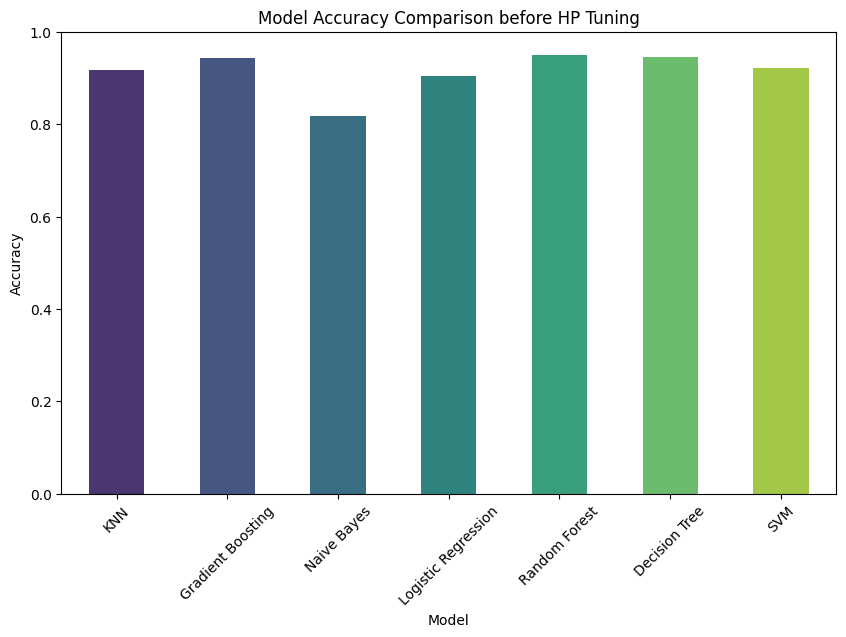

<ipython-input-21-f7dca868af81>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), width=0.5, palette='viridis')  # Adjust width here


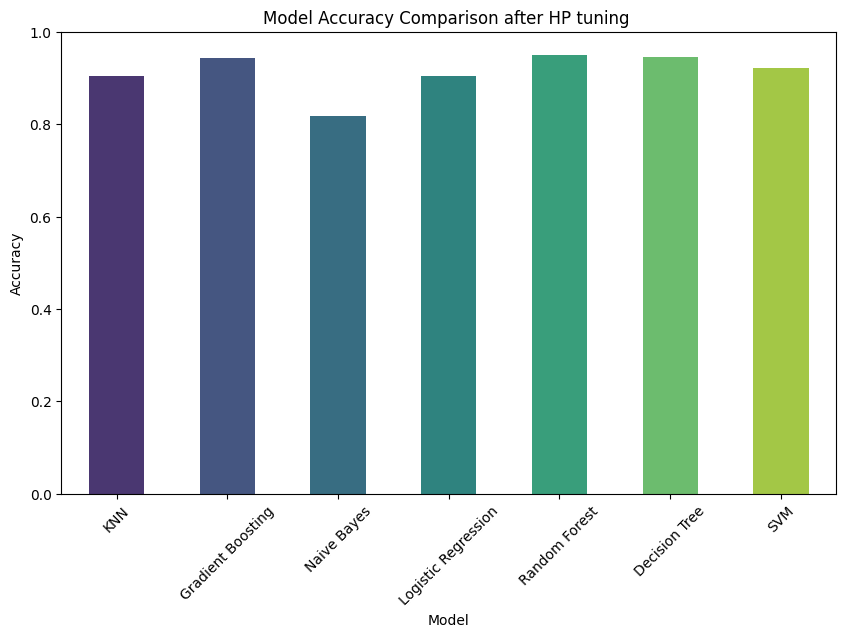

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy scores as values
model_results1 = {
    'KNN':  0.918,
    'Gradient Boosting':  0.944,
    'Naive Bayes': 0.818,
    'Logistic Regression': 0.905,
    'Random Forest': 0.950,
    'Decision Tree':  0.945,
    'SVM': 0.922
}

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results1.keys()), y=list(model_results1.values()), width=0.5, palette='viridis')  # Adjust width here
plt.title('Model Accuracy Comparison before HP Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy percentage

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Create a dictionary with model names as keys and accuracy scores as values
model_results = {
    'KNN': 0.905,
    'Gradient Boosting': 0.944,
    'Naive Bayes':   0.818,
    'Logistic Regression':0.905,
    'Random Forest':  0.950,
    'Decision Tree':  0.945,
    'SVM': 0.922}

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), width=0.5, palette='viridis')  # Adjust width here
plt.title('Model Accuracy Comparison after HP tuning ')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for accuracy percentage

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# **Conclusion:**

After hyperparameter tuning, the results show improved model performance, with significant variations across different algorithms.

**Logistic Regression** achieved a training accuracy of 0.893 and a test accuracy of 0.905, which indicates a good fit to the data with minimal overfitting. The relatively small gap between training and test accuracy suggests the model generalizes well.

**K-Nearest Neighbors (KNN)** showed training accuracy of 0.930 and test accuracy of 0.918, demonstrating a solid performance with a small difference between training and test accuracies, indicating it is a reliable model that generalizes well.

**Naive Bayes** had training accuracy of 0.813 and test accuracy of 0.818, suggesting that despite hyperparameter tuning, it is still underperforming compared to other models. However, it does maintain a close match between training and test accuracy, implying it is not overfitting but just less effective at capturing the complexity of the data.

**Gradient Boosting** demonstrated excellent performance, with a training accuracy of 0.963 and test accuracy of 0.944, indicating that the model is highly effective with a very small drop in performance from training to test data, showing that it has been tuned for optimal performance and generalizes well.

**Random Forest** achieved training accuracy of 1.000 and test accuracy of 0.950, suggesting potential overfitting, as the model perfectly fits the training data. However, the high test accuracy indicates that it is still able to generalize effectively, even if overfitting is a concern.

**Decision Tree** showed training accuracy of 1.000 and test accuracy of 0.945, similar to Random Forest. The perfect training accuracy indicates overfitting, but it still performs well on the test data, though tuning may be required to reduce overfitting further.

**Support Vector Machine (SVM)** recorded training accuracy of 0.909 and test accuracy of 0.922, with a relatively small gap between the two, indicating a well-balanced model that generalizes well after hyperparameter tuning.

In conclusion, **Gradient Boosting** continues to be the best performer, with a minimal gap between training and test accuracies. Random Forest and Decision Tree show potential overfitting due to the perfect training accuracy, but they still perform well on the test set. KNN and Logistic Regression provide solid and reliable performance, while Naive Bayes remains the weakest performer, even after hyperparameter tuning.